In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [ ]:
save_path = "/content/mydrive/My Drive/ex2deep/"

In [ ]:
pip install progress

  Created wheel for progress: filename=progress-1.6-py3-none-any.whl size=9628 sha256=526c136d061fd5f6f47e6df7606a3af0598b3621f99ac67346c7d957bf69acf1
  Stored in directory: /root/.cache/pip/wheels/8e/d7/61/498d8e27dc11e9805b01eb3539e2ee344436fc226daeb5fe87
Successfully built progress


In [ ]:
import os
import cv2
import scipy
import numpy as np
from tqdm import tqdm
from mlxtend.preprocessing import shuffle_arrays_unison
import numpy as np
from progress.bar import IncrementalBar
import sys
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_moons


In [ ]:
pip install python-mnist

In [ ]:
X,y=make_moons(n_samples=500,noise=0.01)

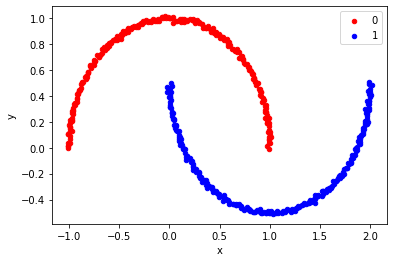

In [ ]:
df=pd.DataFrame(dict(x=X[:,0] , y=X[:,1] , label=y))
fig,ax=plt.subplots()
colors={0:'red' , 1:'blue'}
grouped=df.groupby('label')
for key, group in grouped:
  group.plot(ax=ax,kind='scatter',x='x',y='y',label=key , color=colors[key])

In [ ]:
target=df.label
df.drop(['label'],axis=1,inplace=True)
y=target
print(y)
X=df
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_tets=train_test_split(X,y,test_size=0.2,random_state=1)

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    1
498    1
499    0
Name: label, Length: 500, dtype: int64


In [ ]:
from mnist import MNIST
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
((X_train, y_train), (X_test, y_test)) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [ ]:

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X=X_train
y=y_train

In [ ]:
np.save(save_path+ "Xarray.npy", X)
np.save(save_path+ "Yarray.npy", Y)

NameError: ignored

In [ ]:
X=np.load(save_path+ "Xarray.npy")
y=np.load(save_path+ "Yarray.npy")

FileNotFoundError: ignored

shuffle

In [ ]:
X2, y2 = shuffle_arrays_unison(arrays=[X, y])
X,y=X2,y2

vectorization

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)

In [ ]:
X_test = X_test.reshape(X_test.shape[0], -1)

normalization

In [ ]:
X_manual_scaled = (X-X.min(axis=0)) / (X.max(axis=0)-X.min(axis=0))
X=X_manual_scaled

train test **split**

In [ ]:
train_size = int(0.8 * len(X))
x_train = X[:train_size]
x_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]


In [ ]:
X_train.shape

(60000, 784)

# split

In [ ]:

class Static_split:
    def __init__(self, test_split=0.2):
        self.test_split = test_split

    def set_data(self, X, y, shuffle=True):
        if shuffle == False:
            p = np.arange(X.shape[0])
        else:
            p = np.random.permutation(X.shape[0])

        split = int(X.shape[0] * self.test_split)
        self.X_test = X[p[:split]]
        self.y_test = y[p[:split]]
        self.X_train = X[p[split:]]
        self.y_train = y[p[split:]]

    def get_validation_data(self):
        return self.X_test, self.y_test

    def get_train_data(self):
        return self.X_train, self.y_train


class kfold_split:
    def __init__(self, k=5):
        self.k = k

    def set_data(self, X, y, shuffle=True):
        if shuffle == False:
            p = np.arange(X.shape[0])
        else:
            p = np.random.permutation(X.shape[0])

        self.split = np.random.randint(0, self.k, size=X.shape[0])
        self.X = X
        self.y = y

    def __iter__(self):
        return self.__next__()

    def __next__(self):
        for i in range(self.k):
            yield self.X[self.split != i], self.y[self.split != i], self.X[self.split == i], self.y[self.split == i]

# Layers

In [ ]:

class Dense:
    def __init__(self, unit, activation=linear, input_dim=0, trainable=True):
        self.unit = unit
        self.__name__ = 'Dense'
        self.name = "dense"
        self.trainable = trainable
        if type(activation) == str:
            if activation.lower() == 'linear':
                activation = Linear()
            elif activation.lower() == 'sigmoid':
                activation = Sigmoid()
            elif activation.lower() == 'relu':
                activation = Relu()
            elif activation.lower() == 'softmax':
                activation = Softmax()
            elif activation.lower() == 'tanh':
                activation = Tanh()
            else:
                raise Exception("Activation function " + activation + " not found!")

        self.activation = activation
        self.input_dim = input_dim

    def set_name(self, name):
        self.name = name

    def compile(self, input_dim=-1):
        if input_dim == -1:
            assert self.input_dim != 0
        else:
            self.input_dim = input_dim

        self.W = (np.random.random(size=(self.input_dim + 1, self.unit))) - 0.5
        self.W = self.W / (self.W.std() * (input_dim + self.unit) ** 0.5)

    def __call__(self, X, activation=True):
        if activation:
            return self.activation(np.dot(np.hstack((X, np.ones((X.shape[0], 1)))), self.W))
        else:
            return np.dot(np.hstack((X, np.ones((X.shape[0], 1)))), self.W)

    def set_trainable(self, trainable):
        self.trainable = trainable

    def update(self, dw):
        if self.trainable:
            self.W = self.W + dw

    def reset_weights(self):
        self.W = (np.random.random(size=self.W.shape)) - 0.5
        self.W = self.W / (self.W.std() * (self.W.shape[0] + self.unit) ** 0.5)


# Activations

In [ ]:


# derivative function, gets function output as input and computer derivative
class Linear:
    def __init__(self):
        self.__name__ = 'linear'

    def __call__(self, Z):
        return Z

    def derivative(self, Z, *args, **kwargs):
        return 1


class Relu:
    def __init__(self):
        self.__name__ = 'relu'

    def __call__(self, Z):

        return Z * (Z > 0)

    def derivative(self, Z, *args, **kwargs):
        return (Z > 0) * 1


class Sigmoid:
    def __init__(self):
        self.__name__ = 'sigmoid'

    def __call__(self, Z):
        return 1 / (1 + np.exp(-Z))

    def derivative(self, Z, *args, **kwargs):
        return Z * (1 - Z)


# class Softmax_original:
#     def __call__(self, Z, *args, **kwargs):
#         exp = np.exp(Z)
#         return exp / np.sum(exp, keepdims=True)
#
#     def derivative(self, Z, *args, **kwargs):
#         o = self(Z)
#         return o * (1 - o)


# stable version of softmax:
class Softmax:
    def __init__(self):
        self.__name__ = 'softmax'

    def __call__(self, Z):

        e = -np.max(Z, axis=1, keepdims=True)
        exp = np.exp(Z + e)
        return exp / np.sum(exp, axis=1, keepdims=True)

    def derivative(self, Z, *args, **kwargs):
        raise Exception('cannot get derivative')


class Tanh:
    def __init__(self):
        self.__name__ = 'tanh'

    def __call__(self, Z):
        return np.tanh(Z)

    def derivative(self, Z, *args, **kwargs):
        return 1 - (np.tanh(Z) ** 2)


sigmoid = Sigmoid
softmax = Softmax
relu = Relu
linear = Linear
tanh = Tanh

# Losses

In [ ]:
import numpy as np
from scipy.special import logsumexp

class Cross_entropy:
    def __init__(self, last_layer_activation):
        if last_layer_activation == 'sigmoid':
            self.get_loss = self.call_sigmoid
            self.derivative = self.derivative_sigmoid
        elif last_layer_activation == 'softmax':
            self.get_loss = self.call_softmax
            self.derivative = self.derivative_softmax

    def call_sigmoid(self, z, y):
        # log(1 / (1 + exp(-z)) = -log(1 + exp(-z)) = -logaddexp(0, -z)
        # log(1 - (1 / (1 + exp(-z))) = log(exp(-z) / (1 + exp(-z))) = -z - log(1 + exp(-z)) = -z - logaddexp(0, -z)
        # loss = -(y * log(h) + (1 - y) * log (1 - h))
        # loss = y * logaddexp(0, -z) + (1 - y) * (z + logaddexp(0, -z))
        # loss = y * logaddexp(0, -z) + z + logaddexp(0, -z) - y * z -  y * logaddexp(0, -z))
        # loss = z + logaddexp(0, -z) - y * z
        # loss = z * (1 - y) + logaddexp(0, -z)

        return np.mean(z * (1 - y) + np.logaddexp(0, -z))

    def derivative_sigmoid(self, h, y):
        return h - y

    def call_softmax(self, z, y):
        # loss = - sum(y_k * log(h_k))
        # h_k = exp(z_k) / sum(exp(z_i))
        # loss = - sum(y_k * (z_k - log(sum(exp(z_i)))))

        return -np.mean(np.sum(y * (z - logsumexp(z, axis=1, keepdims=True)), axis=1))

    def derivative_softmax(self, h, y):
        return h - y

    def get_loss(self, h, y):
        return -np.mean(np.sum(y * np.log(h) + (1 - y) * np.log(1 - h), axis=1))

    def derivative(self, h, y):
        return (h - y) / (h * (1 - h))

    def __call__(self, h, y):
        self.get_loss(h, y)


# Model

In [ ]:

class Sequential:
    def __init__(self):
        self.remove_last_layer_activation = False
        self.layers = []
        self.loss = None
        self.optimizer = None
        self.regularization = None
        self.layer_counter = 1

    def add(self, layer):
        layer.set_name('dense_' + str(self.layer_counter))
        self.layer_counter += 1
        self.layers.append(layer)

    def initialize_layers(self):
        input_dim = -1
        for layer in self.layers:
            layer.compile(input_dim)
            input_dim = layer.unit

    def compile(self, optimizer='SGD', loss='cross_entropy', regularization=None):
        if loss.lower() == 'cross_entropy':
            self.loss = Cross_entropy(self.layers[-1].activation.__name__)
            if self.layers[-1].activation.__name__ == "sigmoid" or self.layers[-1].activation.__name__ == "softmax":
                self.remove_last_layer_activation = True

        if type(optimizer) == str:
            if optimizer.lower() == 'sgd':
                optimizer = SGD()
            elif optimizer.lower() == 'momentum_sgd':
                optimizer = Momentum_SGD()
            elif optimizer.lower() == 'adagrad':
                optimizer = Adagrad()
            elif optimizer.lower() == 'rmsprop':
                optimizer = RMSprop()
            elif optimizer.lower() == 'adam':
                optimizer = Adam()
            else:
                raise Exception("Optimizer " + optimizer + " not found!")

        if regularization is not None and type(regularization) == str:
            if regularization.lower() == 'l1':
                regularization = L1()
            elif regularization.lower() == 'l2':
                regularization = L2()

        self.regularization = regularization
        self.optimizer = optimizer


        self.initialize_layers()

    def fit(self, X, y, batch_size=32, epoch=1, test_data=None):
        assert self.loss is not None

        history = {'acc': np.zeros(epoch), 'loss': np.zeros(epoch)}
        if test_data is not None:
            history['val_acc'] = np.zeros(epoch)
            history['val_loss'] = np.zeros(epoch)

        for epch in range(epoch):
            print('Epoch', epch + 1)
            sum_loss = 0
            sum_acc = 0
            bt_conter = 0

            required_batchs = int(X.shape[0] / batch_size + 0.99999999)
            bar = IncrementalBar(max=required_batchs,
                                 suffix='%(index)d/%(max)d - %(eta)ds')

            epoch_shufle = np.random.permutation(X.shape[0])

            for bt in range(0, X.shape[0], batch_size):
                bt_conter += 1
                # single batch:
                X_batch = X[epoch_shufle[bt:min(bt + batch_size, X.shape[0])]]
                y_batch = y[epoch_shufle[bt:min(bt + batch_size, X.shape[0])]]

                layer_output = [X_batch]
                for j, layer in enumerate(self.layers):
                    layer_output.append(layer(layer_output[-1]))

                delta_next = self.loss.derivative(layer_output[-1], y_batch)
                if not self.remove_last_layer_activation:
                    delta_next *= self.layers[-1].activation.derivative(layer_output[-1])

                grad = [0 for i in range(len(self.layers))]
                regularization_grad = [0 for i in range(len(self.layers))]
                if self.regularization is not None:
                    regularization_grad = self.regularization.derivative(self.layers)

                for i in range(len(self.layers) - 1, 0, -1):
                    delta_prev = np.dot(delta_next, self.layers[i].W.T[:, :-1]) * \
                                 self.layers[i - 1].activation.derivative(layer_output[i])

                    delta_wi = np.dot(np.hstack((layer_output[i], np.ones((layer_output[i].shape[0], 1)))).T,
                                      delta_next)
                    grad[i] = delta_wi / X_batch.shape[0] + regularization_grad[i]

                    delta_next = delta_prev

                delta_wi = np.dot(np.hstack((layer_output[0], np.ones((layer_output[0].shape[0], 1)))).T, delta_next)
                grad[0] = delta_wi / X_batch.shape[0] + regularization_grad[0]

                self.optimizer.update(grad, self.layers)

                d = self.evaluate(X_batch, y_batch)
                loss, acc = d['loss'], d['acc']
                sum_acc += acc
                sum_loss += loss
                bar.next()
                sys.stdout.write(" loss: %f acc: %f" % (sum_loss / (bt_conter + 1), sum_acc / (bt_conter + 1)))
                sys.stdout.flush()

            bar.finish()
            d = self.evaluate(X, y)
            loss, acc = d['loss'], d['acc']
            if test_data is not None:
                d = self.evaluate(test_data[0], test_data[1])
                val_loss, val_acc = d['loss'], d['acc']
                history['val_loss'][epch] = val_loss
                history['val_acc'][epch] = val_acc
                history['loss'][epch] = loss
                history['acc'][epch] = acc
                print('loss: {} acc: {} val_loss: {} val_acc: {}'.format(loss, acc, val_loss, val_acc))
            else:
                history['loss'][epch] = loss
                history['acc'][epch] = acc
                print('loss: {} acc: {}'.format(loss, acc))

        return history

    def predict(self, X, batch_size=32, last_activation=True):
        return np.argmax(self.predict_proba(X, batch_size=batch_size, last_activation=last_activation), axis=1)

    def predict_proba(self, X, batch_size=32, last_activation=True):
        output = np.zeros((X.shape[0], self.layers[-1].unit))

        for i in range(0, X.shape[0], batch_size):
            t = X[i:min(i + batch_size, X.shape[0])].copy()
            for j, layer in enumerate(self.layers):
                t = layer(t, activation=(j != len(self.layers) - 1 or last_activation))

            output[i:min(i + batch_size, X.shape[0])] = t

        return output

    def evaluate(self, X, y, batch_size=32):
        if self.loss is not None:
            p = self.predict_proba(X, batch_size=batch_size, last_activation=not self.remove_last_layer_activation)
            loss = self.loss.get_loss(p, y)
            if self.regularization is not None:
                loss += self.regularization.cost(self.layers)

            if self.remove_last_layer_activation:
                p = self.layers[-1].activation(p)

            pred = np.argmax(p, axis=1)
            y_class = np.argmax(y, axis=1)

            acc = np.sum(pred == y_class) / p.shape[0]
            return {'loss': loss, 'acc': acc}
        else:
            p = self.predict_proba(X, batch_size=batch_size)

            pred = np.argmax(p, axis=1)
            y_class = np.argmax(y, axis=1)

            acc = np.sum(pred == y_class) / p.shape[0]
            return {'acc': acc}

    def summary(self):
        print("_" * 65)
        print('Layer (type)                 Output Shape              Param #')
        print("=" * 65)

        layer_type = 'Input'
        output_shape = '(None, {})'.format(str(self.layers[0].input_dim))
        params = '0'
        print('{:<29}'.format(layer_type) +
              '{:<26}'.format(output_shape) +
              '{}'.format(params))
        print("-" * 65)

        trainable_params = 0
        non_trainable_params = 0

        for l in self.layers:
            layer_type = l.name + ' ({})'.format(l.__name__)
            output_shape = '(None, {})'.format(str(l.unit))
            params = '{}'.format(l.W.shape[0] * l.W.shape[1])

            if l.trainable:
                trainable_params += l.W.shape[0] * l.W.shape[1]
            else:
                non_trainable_params += l.W.shape[0] * l.W.shape[1]

            print('{:<29}'.format(layer_type) +
                  '{:<26}'.format(output_shape) +
                  '{}'.format(params))
            print("-" * 65)

        print('Total params:', trainable_params + non_trainable_params)
        print('Trainable params:', trainable_params)
        print('Non-trainable params:', non_trainable_params)
        print("_" * 65)
        print('Optimizer : {}'.format(self.optimizer.__name__))
        if self.regularization is not None:
            print('Regularization : {}'.format(self.regularization.__name__))
        print("-" * 65)
        print()
        print()

    def save_weights(self, path):
        import os
        try:
            os.rmdir(path)
        except:
            pass

        os.mkdir(path)

        for i, layer in enumerate(self.layers):
            np.save(os.path.join(path, str(i) + '.npy'), layer.W)

    def load_weights(self, path):
        import os
        assert len(os.listdir(path)) == len(self.layers)

        for i, layer in enumerate(self.layers):
            self.layers[i].W = np.load(os.path.join(path, str(i) + '.npy'))

    def reset_weights(self):
        for layer in self.layers:
            layer.reset_weights()


# Optimizer

In [ ]:


class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.__name__ = 'SGD'

    def update(self, grads, layers):

        for layer, delta in zip(layers, grads):
            layer.update(-delta * self.lr)


class Momentum_SGD(SGD):
    def __init__(self, lr=0.01, momentum=0.9):
        super().__init__(lr)
        self.momentum = momentum

        # Helping attribute
        self.velocity = None

        self.__name__ = 'Momentum_SGD'

    def update(self, grads, layers):


        if self.velocity == None:
            self.velocity = [np.zeros(layer.W.shape) for layer in layers]
        for i in range(len(layers)):
            self.velocity[i]= self.momentum  * self.velocity[i]+ (-1* grads[i] * self.lr)
            layers[i].update(self.velocity[i])




class Adagrad:
    def __init__(self, lr=0.01):
        self.global_lr = lr
        self.epsilon = 1e-7
        self.velocity = None
        self.accumulated_gradient = None

        self.__name__ = 'AdaGrad'

    def update(self, grads, layers):

        if self.accumulated_gradient == None:
            self.accumulated_gradient = [np.zeros(layer.W.shape) for layer in layers]
        for i in range(len(layers)):
            self.accumulated_gradient[i]+= grads[i] * grads[i] 
            layers[i].update(self.global_lr* -grads[i] / (self.epsilon + np.sqrt(self.accumulated_gradient[i])))



class RMSprop:
    def __init__(self, lr=0.001, rho=0.9):
        self.global_lr = lr
        self.rho = rho
        self.epsilon = 1e-7

        # Helping attribute
        self.velocity = None
        self.accumulated_gradient = None

        self.__name__ = 'RMSprop'

    def update(self, grads, layers):

        if self.accumulated_gradient == None:
            self.accumulated_gradient = [np.zeros(layer.W.shape) for layer in layers]
        for i in range(len(layers)):
            self.accumulated_gradient[i]= self.rho * self.accumulated_gradient[i] + (1- self.rho) *grads[i] * grads[i] 
            layers[i].update(self.global_lr* -grads[i] / ( np.sqrt(self.epsilon + self.accumulated_gradient[i])))




class Adam(Adagrad):
    def __init__(self, lr=0.001, rho_1=0.9, rho_2=0.999):
        self.global_lr = lr
        self.rho_1 = rho_1
        self.rho_2 = rho_2

        # Helping attribute
        self.first_moment_estimate = None
        self.second_moment_estimate = None
        self.t = 0
        self.__name__ = 'Adam'

    def update(self, grads, layers):


        if self.first_moment_estimate == None:
            self.first_moment_estimate = [np.zeros(layer.W.shape) for layer in layers]
            
        if self.second_moment_estimate == None:
            self.second_moment_estimate = [np.zeros(layer.W.shape) for layer in layers]
        for i in range(len(layers)):
            self.first_moment_estimate[i]= self.rho_1 * self.first_moment_estimate[i] + (1- self.rho_1)* grads[i]
            self.second_moment_estimate[i]= self.rho_2 * self.second_moment_estimate[i] + (1- self.rho_2)* grads[i]* grads[i]  
            s = self.first_moment_estimate[i] / (1 - self.rho_1**(t))
            r = self.second_moment_estimate[i] / (1 - self.rho_2**(t))
            layers[i].update(self.global_lr * -s / ( np.sqrt(self.epsilon + r)))

        # define RMSprop update rule here.


sgd = SGD
momentom_sgd = Momentum_SGD
adagrad = Adagrad
rmsprop = RMSprop
adam = Adam

# Regularization

In [ ]:
import numpy as np


class L2:
    def __init__(self, lam=0.001):
        self.lam = lam
        self.__name__ = 'L2 Regularization'

    def cost(self, layers):

        for i in range(len(layers)):
            cost += np.sum(np.square(l.W[:-1, :]))
        return 1/2*cost * self.lam


    def derivative(self, layers):

        derivative = []
        for i in range(len(layers)):
          derivative[i] = np.Vstack(layers[i].W[:-1, :], np.zeros(layers[i].W.shape[1]))
        return [derivative[i] * self.lam for l in layers]



class L1:
    def __init__(self, lam=0.001):
        self.lam = lam
        self.__name__ = 'L1 Regularization'

    def cost(self, layers):


        for i in range(len(layers)):
            cost += np.sum(np.abs(l.W[:-1, :]))
        return 1/2* cost * self.lam



    def derivative(self, layers):

        derivative = []
        for i in range(len(layers)):
           derivative[i] = np.vstack(np.sign(l.W[:-1, :]), np.zeros(layers[i].W.shape[1]))
        return [derivative[i] * self.lam for l in layers]





# Test

In [ ]:
X_train.size

800

In [ ]:
y_train

238    0
438    1
475    1
58     0
380    0
      ..
255    0
72     1
396    0
235    1
37     0
Name: label, Length: 400, dtype: int64

In [ ]:
y_train

238    0
438    1
475    1
58     0
380    0
      ..
255    0
72     1
396    0
235    1
37     0
Name: label, Length: 400, dtype: int64

In [ ]:
X_train

,x,y
238,-0.821493,0.547618
438,0.163143,-0.074734
475,0.090651,0.066048
58,0.148381,0.996551
380,-0.992718,0.090162
...,...,...
255,-0.666454,0.733842
72,1.990226,0.417914
396,-0.936054,0.342217
235,0.688008,-0.443998


In [ ]:
seed = 7
np.random.seed(seed)

# generate two datasets and print their shape
X,y = make_moons(n_samples = 6000, noise = 0.08)
print('X:\t{}' .format(X.shape))
print('y:\t{}' .format(y.shape))
print(type(X))
print(type(y))

# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X:	(6000, 2)
y:	(6000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


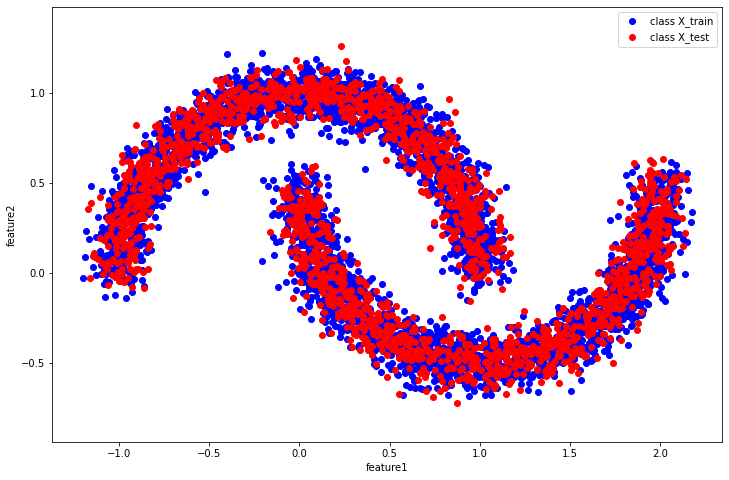

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X_train[:,0],X_train[:,1], color = 'b', label = 'class X_train')
plt.scatter(X_test[:,0],X_test[:,1], color = 'r', label = 'class X_test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()

In [ ]:
X_train.shape

(4800, 2)

In [ ]:
# this code is an example of how to use Models
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

model = Sequential()
model.add(Dense(100, 'relu', input_dim=X_train.shape[1]))  # firs layer, 400 neurons with relu activation function
#model.add(Dense(200, 'sigmoid'))  # second layer, 200 neurons with sigmoid activation function
#model.add(Dense(100, 'tanh'))  # third layer, 100 neurons with tanh activation function
#model.add(Dense(50, 'linear'))  # fourth layer, 50 neurons with linear activation function
model.add(Dense(1, 'sigmoid'))  # fifth layer, 10 neurons with softmax activation function (output)

model.compile(loss='cross_entropy', optimizer='sgd', regularization=None)

model.summary()

history = model.fit(X_train, y_train, epoch=10, batch_size=64, test_data=(X_test, y_test))

plt.figure()
plt.subplot(1, 2, 1)
plt.title('acc')
plt.plot(history['acc'], 'b-o', label='Train')
plt.plot(history['val_acc'], 'r--o', label='Test')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.title('loss')
plt.plot(history['loss'], 'b-o', label='Train')
plt.plot(history['val_loss'], 'r--o', label='Test')
plt.grid()
plt.legend()

plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #
Input                        (None, 2)                 0
-----------------------------------------------------------------
dense_1 (Dense)              (None, 100)               300
-----------------------------------------------------------------
dense_2 (Dense)              (None, 1)                 101
-----------------------------------------------------------------
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
Optimizer : SGD
-----------------------------------------------------------------


Epoch 1


ValueError: ignored

In [ ]:
X_train.shape,

(4020, 2)

In [ ]:
# this code is an example of how to use Models

split=Static_split()
split.set_data(X,y)
X_train,y_train=split.get_train_data()
X_validation,y_validation=split.get_validation_data()
X_train = X_train.reshape(X_train.shape[0], -1)
X_validation = X_validation.reshape(X_validation.shape[0], -1)
model = Sequential()
model.add(Dense(100, 'relu', input_dim=X_train.shape[1]))  # firs layer, 400 neurons with relu activation function
#model.add(Dense(200, 'sigmoid'))  # second layer, 200 neurons with sigmoid activation function
#model.add(Dense(100, 'tanh'))  # third layer, 100 neurons with tanh activation function
#model.add(Dense(50, 'linear'))  # fourth layer, 50 neurons with linear activation function
model.add(Dense(10, 'softmax'))  # fifth layer, 10 neurons with softmax activation function (output)

model.compile(loss='cross_entropy', optimizer='sgd', regularization=None)

model.summary()

history = model.fit(X_train, y_train, epoch=10, batch_size=64, test_data=(X_validation, y_validation))

plt.figure()
plt.subplot(1, 2, 1)
plt.title('acc')
plt.plot(history['acc'], 'b-o', label='Train')
plt.plot(history['val_acc'], 'r--o', label='Test')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.title('loss')
plt.plot(history['loss'], 'b-o', label='Train')
plt.plot(history['val_loss'], 'r--o', label='Test')
plt.grid()
plt.legend()

plt.show()

In [ ]:
# this code is an example of how to use Models

split=Static_split()
split.set_data(X,y)
X_train,y_train=split.get_train_data()
X_validation,y_validation=split.get_validation_data()
X_train = X_train.reshape(X_train.shape[0], -1)
X_validation = X_validation.reshape(X_validation.shape[0], -1)
model = Sequential()
model.add(Dense(200, 'relu', input_dim=X_train.shape[1]))  # firs layer, 400 neurons with relu activation function

model.add(Dense(10, 'softmax'))  # fifth layer, 10 neurons with softmax activation function (output)

model.compile(loss='cross_entropy', optimizer='sgd', regularization=None)

model.summary()

history = model.fit(X_train, y_train, epoch=10, batch_size=64, test_data=(X_validation, y_validation))

plt.figure()
plt.subplot(1, 2, 1)
plt.title('acc')
plt.plot(history['acc'], 'b-o', label='Train')
plt.plot(history['val_acc'], 'r--o', label='Test')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.title('loss')
plt.plot(history['loss'], 'b-o', label='Train')
plt.plot(history['val_loss'], 'r--o', label='Test')
plt.grid()
plt.legend()

plt.show()

In [ ]:
X_train.shape

In [ ]:
# this code is an example of how to use Models

split=Static_split()
split.set_data(X,y)
X_train,y_train=split.get_train_data()
X_validation,y_validation=split.get_validation_data()
X_train = X_train.reshape(X_train.shape[0], -1)
X_validation = X_validation.reshape(X_validation.shape[0], -1)
model = Sequential()
model.add(Dense(50, 'relu', input_dim=X_train.shape[1]))  # firs layer, 400 neurons with relu activation function

model.add(Dense(10, 'softmax'))  # fifth layer, 10 neurons with softmax activation function (output)

model.compile(loss='cross_entropy', optimizer='sgd', regularization=None)

model.summary()

history = model.fit(X_train, y_train, epoch=10, batch_size=64, test_data=(X_validation, y_validation))

plt.figure()
plt.subplot(1, 2, 1)
plt.title('acc')
plt.plot(history['acc'], 'b-o', label='Train')
plt.plot(history['val_acc'], 'r--o', label='Test')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.title('loss')
plt.plot(history['loss'], 'b-o', label='Train')
plt.plot(history['val_loss'], 'r--o', label='Test')
plt.grid()
plt.legend()

plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #
Input                        (None, 2)                 0
-----------------------------------------------------------------
dense_1 (Dense)              (None, 50)                150
-----------------------------------------------------------------
dense_2 (Dense)              (None, 10)                510
-----------------------------------------------------------------
Total params: 660
Trainable params: 660
Non-trainable params: 0
_________________________________________________________________
Optimizer : SGD
-----------------------------------------------------------------


Epoch 1


ValueError: ignored

In [ ]:
# this code is an example of how to use Models


model = Sequential()
model.add(Dense(100, 'relu', input_dim=X_train.shape[1]))  # firs layer, 400 neurons with relu activation function
#model.add(Dense(200, 'sigmoid'))  # second layer, 200 neurons with sigmoid activation function
#model.add(Dense(100, 'tanh'))  # third layer, 100 neurons with tanh activation function
#model.add(Dense(50, 'linear'))  # fourth layer, 50 neurons with linear activation function
model.add(Dense(10, 'softmax'))  # fifth layer, 10 neurons with softmax activation function (output)

model.compile(loss='cross_entropy', optimizer='sgd', regularization=None)

model.summary()

history = model.fit(X_train, y_train, epoch=10, batch_size=64, test_data=(X_test, y_test))

plt.figure()
plt.subplot(1, 2, 1)
plt.title('acc')
plt.plot(history['acc'], 'b-o', label='Train')
plt.plot(history['val_acc'], 'r--o', label='Test')
plt.grid()
plt.legend()

plt.subplot(1, 2, 1)
plt.title('loss')
plt.plot(history['loss'], 'b-o', label='Train')
plt.plot(history['val_loss'], 'r--o', label='Test')
plt.grid()
plt.legend()

plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #
Input                        (None, 2)                 0
-----------------------------------------------------------------
dense_1 (Dense)              (None, 100)               300
-----------------------------------------------------------------
dense_2 (Dense)              (None, 10)                1010
-----------------------------------------------------------------
Total params: 1310
Trainable params: 1310
Non-trainable params: 0
_________________________________________________________________
Optimizer : SGD
-----------------------------------------------------------------


Epoch 1


ValueError: ignored

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
plt.title('acc')
plt.plot(history['acc'], 'b-o', label='Train')
plt.plot(history['val_acc'], 'r--o', label='Test')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.title('loss')
plt.plot(history['loss'], 'b-o', label='Train')
plt.plot(history['val_loss'], 'r--o', label='Test')
plt.grid()
plt.legend()

plt.show()